# Exploration

In [1]:
# import libraries

import json
import nltk

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

In [2]:
# data folder

data_folder = '../../data/social_media'

In [3]:
# load all generated captions

with open(f"{data_folder}/captions.json", 'r', encoding='utf-8') as file:
    captions = json.load(file)

In [4]:
# create a dataframe

captions_df = pd.DataFrame(captions, columns=['caption'])

In [5]:
# text length analysis

captions_df['text_length'] = captions_df['caption'].apply(len)
captions_df['word_count'] = captions_df['caption'].apply(lambda x: len(x.split()))

print(captions_df[['text_length', 'word_count']].describe())

       text_length   word_count
count  1000.000000  1000.000000
mean     63.346000    12.875000
std      11.416506     2.215916
min      37.000000     7.000000
25%      57.000000    11.750000
50%      62.000000    13.000000
75%      68.000000    14.000000
max     167.000000    35.000000


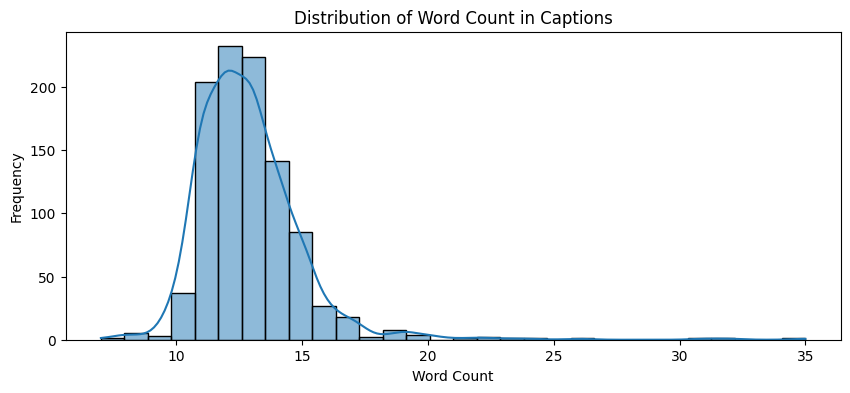

In [6]:
# distribution of word count in captions

plt.figure(figsize=(10, 4))
sns.histplot(captions_df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count in Captions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [7]:
# download nltk stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diogofisilva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def tokenize_and_filter(caption : str) -> list[str]:
    '''
    Tokenizes words and filters stopwords in a caption
    '''
    words = caption.lower().split()
    return [word for word in words if word not in stop_words and word.isalpha()]

In [9]:
# tokenize and filter all captions

captions_df['tokens'] = captions_df['caption'].apply(tokenize_and_filter)

In [10]:
# assemble all words

all_words = [word for tokens in captions_df['tokens'] for word in tokens]

In [11]:
# top 10 most common words

word_counts = Counter(all_words)

word_counts.most_common(10)

[('photograph', 1000),
 ('woman', 377),
 ('man', 192),
 ('standing', 177),
 ('sitting', 155),
 ('two', 146),
 ('front', 100),
 ('holding', 97),
 ('dress', 85),
 ('people', 82)]

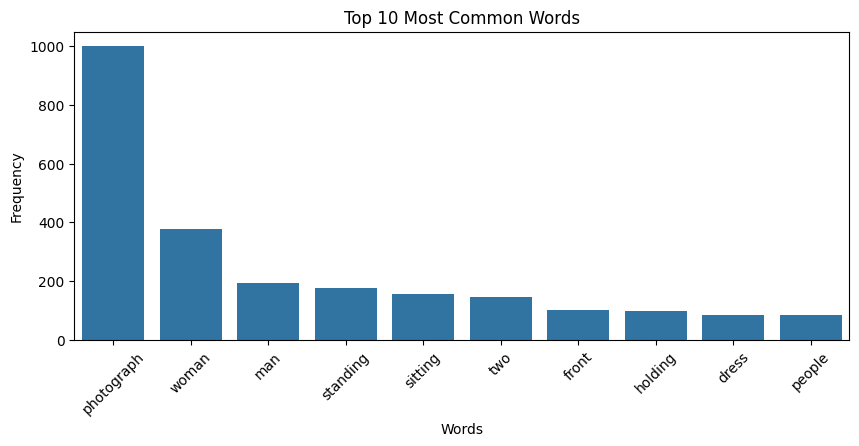

In [12]:
# frequency of the top 10 most common words

common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 4))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

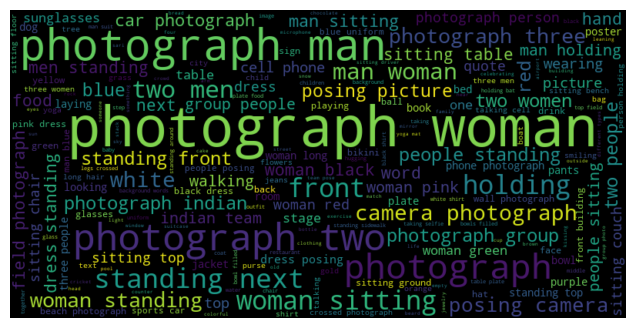

In [13]:
# word cloud

wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(' '.join(all_words))

plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
def gender_mentioned(tokens : str) -> str | None:
    '''
    Checks for gender terms in the caption
    '''
    men_or_man = ('men' in tokens or 'man' in tokens)
    women_or_woman = ('women' in tokens or 'woman' in tokens)
    if men_or_man and not women_or_woman:
        return 'male'
    elif women_or_woman and not men_or_man:
        return 'female'
    else:
        return 'other'

In [15]:
# count captions from a male, female or undefined

captions_df['category'] = captions_df['tokens'].apply(gender_mentioned)
counts = captions_df['category'].value_counts()

print(counts)

category
other     421
female    369
male      210
Name: count, dtype: int64


In [61]:
# check for captions with indian terms

terms = [
    'in india',
    'of indian',
    'an indian',
    'the indian',
    'traditional indian',
    'cricket',
    'taking the wicket',
    ' sari ',
    'red and gold sari'
    'saris'
]

for caption in captions:
    caption_terms = []
    for term in terms:
      if term in caption:
          caption_terms.append(term)
    if caption_terms:
        print('-' * 120)
        print(caption)
        print(caption_terms)

------------------------------------------------------------------------------------------------------------------------
a photograph of indian cricket team celebrating after winning the match
['of indian', 'cricket']
------------------------------------------------------------------------------------------------------------------------
a photograph of the indian team is congratulating each other
['the indian']
------------------------------------------------------------------------------------------------------------------------
a photograph of the indian team pose for a group photo
['the indian']
------------------------------------------------------------------------------------------------------------------------
a photograph of the indian team celebrates after taking the wicket
['the indian', 'taking the wicket']
------------------------------------------------------------------------------------------------------------------------
a photograph of an indian couple posing for the c

In [56]:
# check for captions with format issues

issues = [
    "s '",
    " ' s",
    " ' t",
    "' ralph",
    "kingdom '",
    " %",
    " ' re"
]

for caption in captions:
    caption_issues = []
    for issue in issues:
      if issue in caption:
          caption_issues.append(issue)
    if caption_issues:
        print('-' * 120)
        print(caption)
        print(caption_issues)

------------------------------------------------------------------------------------------------------------------------
a photograph of a tweet with the caption ' s image of joel brown
[" ' s"]
------------------------------------------------------------------------------------------------------------------------
a photograph of a yellow piece of paper with the words ' 99 % of the harms caused in your head by you and your thoughts 1 % of the ham is actually happy what
["s '", ' %']
------------------------------------------------------------------------------------------------------------------------
a photograph of michael hyatt with the quote you have to be conscious of your story because the story that you ' re telling yourself in your head becomes a controlling
[" ' re"]
------------------------------------------------------------------------------------------------------------------------
a photograph of a quote with the words if that ' s you, we completely empathize and have som